<a href="https://colab.research.google.com/github/rishabhdikhit/Netflix-analysis----scaler-business-case/blob/main/NETFLIX_business_case_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NETFLIX CASE STUDIES

#Business Problem
Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

#Netflix Dataset
Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

###The dataset consists of a list of all the TV shows/movies available on Netflix:

Show_id: Unique ID for every Movie / Tv Show

Type: Identifier - A Movie or TV Show

Title: Title of the Movie / Tv Show

Director: Director of the Movie

Cast: Actors involved in the movie/show

Country: Country where the movie/show was produced

Date_added: Date it was added on Netflix

Release_year: Actual Release year of the movie/show

Rating: TV Rating of the movie/show

Duration: Total Duration - in minutes or number of seasons

Listed_in: Genre

Description: The summary description

#Objectives of the Project
Perform EDA on the given dataset and find insights.
Provide Useful Insights and Business recommendations that can help the business to grow.




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Loading the data and Basic Observations

In [ ]:
df = pd.read_csv("netflix.csv")
df.head(7)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [ ]:
df.shape #there are 8807 rows and 12 columns in the data set

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
df.describe() #Only single column having numerical values.
#It gives idea of release year of the content ranges between what timeframe. Rest all the columns are having categorical data.

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


#Data Cleaning

In [ ]:
#finding null vlaues
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


there are 3 missing values in duration column , and it is also found that by mistake those data got entered in rating column

In [ ]:
du_ind = df[df.duration.isna()].index
du_ind

Int64Index([5541, 5794, 5813], dtype='int64')

In [ ]:
df.loc[du_ind] = df.loc[du_ind].fillna(method = 'ffill' , axis = 1)


In [ ]:
# replaced the wrong entries done in the rating column
df.loc[du_ind ,'rating'] = 'Not Available'

In [ ]:
df.loc[du_ind]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not Available,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not Available,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not Available,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
# null values in rating column
df[df.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
rat_ind = df[df.rating.isna()].index
rat_ind

Int64Index([5989, 6827, 7312, 7537], dtype='int64')

In [ ]:
df.loc[rat_ind]=df.loc[rat_ind].fillna("Not Available")

In [ ]:
df.loc[rat_ind]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Not Available,"Oprah Winfrey, Ava DuVernay",Not Available,"January 26, 2017",2017,Not Available,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Not Available,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Not Available,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Not Available,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Not Available,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Available,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Not Available', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

In movie/TV rating NR and UR means same thing NOT RATED.

In [ ]:
df.rating.value_counts()

TV-MA            3207
TV-14            2160
TV-PG             863
R                 799
PG-13             490
TV-Y7             334
TV-Y              307
PG                287
TV-G              220
NR                 80
G                  41
Not Available       7
TV-Y7-FV            6
NC-17               3
UR                  3
Name: rating, dtype: int64

NR=80 and Ur = 3

so we change ur to NR

In [ ]:
df.loc[df["rating"] == "UR"] ="NR"


In [ ]:
df.rating.value_counts()

TV-MA            3207
TV-14            2160
TV-PG             863
R                 799
PG-13             490
TV-Y7             334
TV-Y              307
PG                287
TV-G              220
NR                 83
G                  41
Not Available       7
TV-Y7-FV            6
NC-17               3
Name: rating, dtype: int64

dropping the na in date added columns

In [ ]:
df.drop(df.loc[df['date_added'].isna()].index , axis = 0 , inplace = True)

In [ ]:
df['date_added'].value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

In [ ]:
df['date_added'] = df['date_added'].astype(str)

In [ ]:
df = df[df['date_added'] != 'NR']
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month

#Data Exploration and Non Graphical Analysis

In [ ]:
# 2 types of content present in dataset - either Movie or TV Show
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
movies  = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']

In [ ]:
movies.duration.value_counts()

90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

In [ ]:
tv_shows.duration.value_counts()

1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

movies and tv_shows have different durations hence changing duration of each asper the req.

In [ ]:
tv_shows['duration'] = tv_shows.duration.str[:-7].apply(lambda x : x.strip())
tv_shows['duration'] = tv_shows['duration'].astype('float')
movies['duration'] = movies['duration'].str[:-3]
movies['duration'] = movies['duration'].astype('float')
tv_shows.rename({'duration': 'duration_in_seasons'} ,axis = 1 , inplace = True)
movies.rename({'duration': 'duration_in_minutes'} ,axis = 1 , inplace = True)

In [ ]:
tv_shows.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_in_seasons,listed_in,description,day_added,year_added,month_added
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,2021,9


In [ ]:
movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_in_minutes,listed_in,description,day_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",25,2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,2021,9


when was first movie added on netflix and when is the most recent movie added on netflix as per data i.e. dataset duration

and when they were actually released

In [ ]:
timeperiod = pd.DataFrame({'Date Added': [df['date_added'].min().strftime('%B %Y'),
                                          df['date_added'].max().strftime('%B %Y')],
                           'Released Year': [df["release_year"].min(), df["release_year"].max()]
})


timeperiod

,Date Added,Released Year
0,January 2008,1925
1,September 2021,2021


different ratings for each type of content

In [ ]:
df.groupby(['type' , 'rating'])['show_id'].count()

type     rating       
Movie    G                  41
         NC-17               3
         NR                 75
         Not Available       5
         PG                287
         PG-13             490
         R                 797
         TV-14            1427
         TV-G              126
         TV-MA            2062
         TV-PG             540
         TV-Y              131
         TV-Y7             139
         TV-Y7-FV            5
TV Show  NR                  4
         Not Available       2
         R                   2
         TV-14             730
         TV-G               94
         TV-MA            1143
         TV-PG             321
         TV-Y              175
         TV-Y7             194
         TV-Y7-FV            1
Name: show_id, dtype: int64

percent of NULL value in each column

In [ ]:
round((df.isna().sum()/ df.shape[0])*100)

show_id          0.0
type             0.0
title            0.0
director        30.0
cast             9.0
country          9.0
date_added       0.0
release_year     0.0
rating           0.0
duration         0.0
listed_in        0.0
description      0.0
day_added        0.0
year_added       0.0
month_added      0.0
dtype: float64



*   country column




In [ ]:
df.country.value_counts()

United States                             2811
India                                      972
United Kingdom                             418
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

there are many countries seperated by comma in one row. so exploding it ti get the real value count as we can see that many movies are produced in more than 1 country.

In [ ]:
country_tb = df[['show_id' , 'type' , 'country']]
country_tb.dropna(inplace = True)
country_tb['country'] = country_tb['country'].apply(lambda x : x.split(', '))
country_tb = country_tb.explode('country')
country_tb

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,United States
7,s8,Movie,Ghana
...,...,...,...
8801,s8802,Movie,Jordan
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [ ]:
country_tb.country.value_counts()

United States     3682
India             1046
United Kingdom     802
Canada             445
France             391
                  ... 
Ecuador              1
Not Available        1
Armenia              1
Belarus              1
Montenegro           1
Name: country, Length: 128, dtype: int64

In [ ]:
country_tb.country.nunique()

128

checking for any blank country

In [ ]:
country_tb.loc[country_tb['country'] == '']

,show_id,type,country
193,s194,TV Show,
365,s366,Movie,


In [ ]:
country_tb = country_tb.loc[country_tb['country'] != '']

In [ ]:
country_tb['country'].nunique()

127

hence w can say that netflix is presnt in 127 country

FINDING total movies and tv shows in each country.

In [ ]:
movie_tv_div= country_tb.groupby(['country' , 'type'])['show_id'].count().reset_index()
movie_tv_div

,country,type,show_id
0,Afghanistan,Movie,1
1,Albania,Movie,1
2,Algeria,Movie,3
3,Angola,Movie,1
4,Argentina,Movie,71
...,...,...,...
182,Venezuela,Movie,4
183,Vietnam,Movie,7
184,West Germany,Movie,3
185,West Germany,TV Show,2


In [ ]:
movie_tv_div=movie_tv_div.pivot(index = ['country'] , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)
movie_tv_div

type,Movie,TV Show
country,,
United States,2750.0,932.0
India,962.0,84.0
United Kingdom,531.0,271.0
Canada,319.0,126.0
France,301.0,90.0
...,...,...
Azerbaijan,NaN,1.0
Belarus,NaN,1.0
Cuba,NaN,1.0


now lets check director  column



In [ ]:
df['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

exploding movies same as we did with countries and also dropping NAn values.

In [ ]:
dir_tb = df[['show_id' , 'type' , 'director']]
dir_tb.dropna(inplace = True)
dir_tb['director'] = dir_tb['director'].apply(lambda x : x.split(', '))
dir_tb = dir_tb.explode('director')

In [ ]:
dir_tb

,show_id,type,director
0,s1,Movie,Kirsten Johnson
2,s3,TV Show,Julien Leclercq
5,s6,TV Show,Mike Flanagan
6,s7,Movie,Robert Cullen
6,s7,Movie,José Luis Ucha
...,...,...,...
8801,s8802,Movie,Majid Al Ansari
8802,s8803,Movie,David Fincher
8804,s8805,Movie,Ruben Fleischer
8805,s8806,Movie,Peter Hewitt


In [ ]:
#checking if there is any blank resent in director
dir_tb.director.apply(lambda x : True if len(x) == 0 else False).value_counts()

False    6978
Name: director, dtype: int64

total number of rows and false is equal.


In [ ]:
dir_tb['director'].nunique()

4993

finding total number of movies and tv_show related to each director.

In [ ]:
x = dir_tb.groupby(['director' , 'type'])['show_id'].count().reset_index()
x.pivot(index= ['director'] , columns = 'type' , values = 'show_id').sort_values('Movie' ,ascending = False)

type,Movie,TV Show
director,,
Rajiv Chilaka,22.0,NaN
Jan Suter,21.0,NaN
Raúl Campos,19.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0
...,...,...
Vijay S. Bhanushali,NaN,1.0
Wouter Bouvijn,NaN,1.0
YC Tom Lee,NaN,1.0


###lets know more about genres so we look listed_in

In [ ]:
genre_tb = df[['show_id' , 'type', 'listed_in']]
genre_tb

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,"Docuseries, Reality TV"
4,s5,TV Show,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...
8802,s8803,Movie,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,"Comedies, Horror Movies"
8805,s8806,Movie,"Children & Family Movies, Comedies"


In [ ]:
genre_tb['listed_in'] = genre_tb['listed_in'].apply(lambda x : x.split(','))
genre_tb = genre_tb.explode('listed_in')

In [ ]:
genre_tb

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


In [ ]:
genre_tb.query('type == "TV Show"')['listed_in'].value_counts()

International TV Shows           773
 TV Dramas                       695
 International TV Shows          577
 TV Comedies                     455
Crime TV Shows                   399
Kids' TV                         386
 Romantic TV Shows               338
British TV Shows                 252
Docuseries                       220
Anime Series                     175
 Docuseries                      174
 Spanish-Language TV Shows       171
 Korean TV Shows                 151
 Reality TV                      135
 TV Action & Adventure           128
Reality TV                       120
TV Comedies                      119
 TV Mysteries                     98
 Science & Nature TV              92
 TV Sci-Fi & Fantasy              82
 Crime TV Shows                   70
 Teen TV Shows                    69
TV Dramas                         67
 TV Horror                        64
 Kids' TV                         63
 TV Thrillers                     57
TV Action & Adventure             39
S

In [ ]:
genre_tb.query('type == "Movie"')['listed_in'].value_counts()

 International Movies        2622
Dramas                       1598
Comedies                     1210
Action & Adventure            858
Documentaries                 829
 Dramas                       827
 Independent Movies           736
 Romantic Movies              611
Children & Family Movies      605
 Thrillers                    512
 Comedies                     463
 Music & Musicals             357
Stand-Up Comedy               334
Horror Movies                 275
 Sci-Fi & Fantasy             230
 Sports Movies                218
International Movies          128
 LGBTQ Movies                 101
 Horror Movies                 82
Classic Movies                 80
 Faith & Spirituality          65
Thrillers                      65
 Cult Movies                   59
Movies                         57
 Anime Features                50
 Documentaries                 40
 Children & Family Movies      36
 Classic Movies                36
Anime Features                 21
Independent Mo

In [ ]:
genre_tb.listed_in.nunique()

73

there are 42 unique gener

cast column --- exploring

In [ ]:
cast_tb = df[['show_id' , 'type' ,'cast']]
cast_tb.dropna(inplace = True)
cast_tb['cast'] = cast_tb['cast'].apply(lambda x : x.split(', '))
cast_tb = cast_tb.explode('cast')
cast_tb

,show_id,type,cast
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
1,s2,TV Show,Dillon Windvogel
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [ ]:
# checking empty strings
cast_tb[cast_tb['cast'] == '']

,show_id,type,cast


In [ ]:
# Total unique actors
cast_tb.cast.nunique()

36387

In [ ]:
# Total movies/TV shows by each actor
x = cast_tb.groupby(['cast' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'cast' , columns = 'type' ,
        values = 'show_id').sort_values('TV Show' ,
                                        ascending = False)

type,Movie,TV Show
cast,,
Takahiro Sakurai,7.0,25.0
Yuki Kaji,10.0,19.0
Ai Kayano,2.0,17.0
Daisuke Ono,5.0,17.0
Junichi Suwabe,4.0,17.0
...,...,...
Şerif Sezer,1.0,NaN
Şevket Çoruh,1.0,NaN
Şinasi Yurtsever,3.0,NaN


#4. Visual Analysis

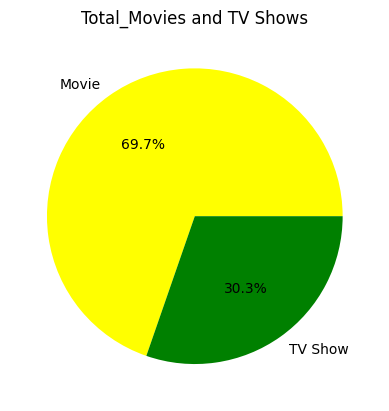

In [ ]:
types = df.type.value_counts()
plt.pie(types,  labels=types.index, autopct='%1.1f%%' , colors = ['yellow' , 'green'])
plt.title('Total_Movies and TV Shows')
plt.show()

change in movies and tv show over time and how they are added

In [ ]:
d = df.groupby(['year_added' ,'type' ])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)

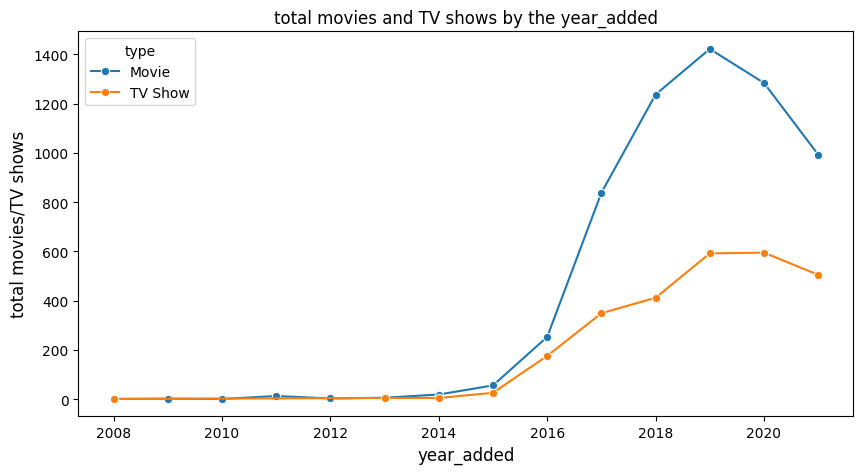

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(data = d , x = 'year_added' , y = 'total movies/TV shows' , hue = 'type', marker = 'o'  , ms = 6)
plt.xlabel('year_added' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('total movies and TV shows by the year_added' , fontsize = 12)
plt.show()

Observation:



1.   The content added on the Netflix surged drastically after 2015.
2.  2019 marks the highest number of movies and TV shows added on the Netflix.
3.  Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not dropped as drastic as movies.

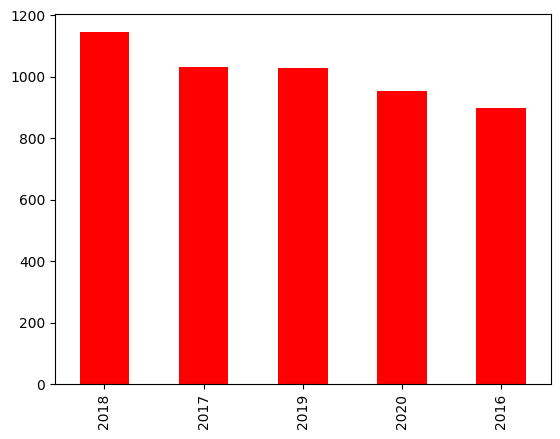

In [ ]:
# films yeary release
films_rel=df['release_year'].value_counts().sort_values(ascending=False).head()
films_rel.plot(kind='bar',color='r')
plt.show()

Observation:

1. 2018 marks the highest number of movie and TV show
releases.
2. Since 2018, A drop in movies is seen and rise in TV shows is observed clearly, and TV shows surpasses the movies count in mid 2020.
3. In recent years TV shows are focussed more than Movies.
4. The yearly number of releases has surged drastically from 2015.

In [ ]:
# total Movies directed by top 10 directors
top_10_dir = dir_tb.director.value_counts().head(10).index
df_new = dir_tb.loc[dir_tb['director'].isin(top_10_dir)]


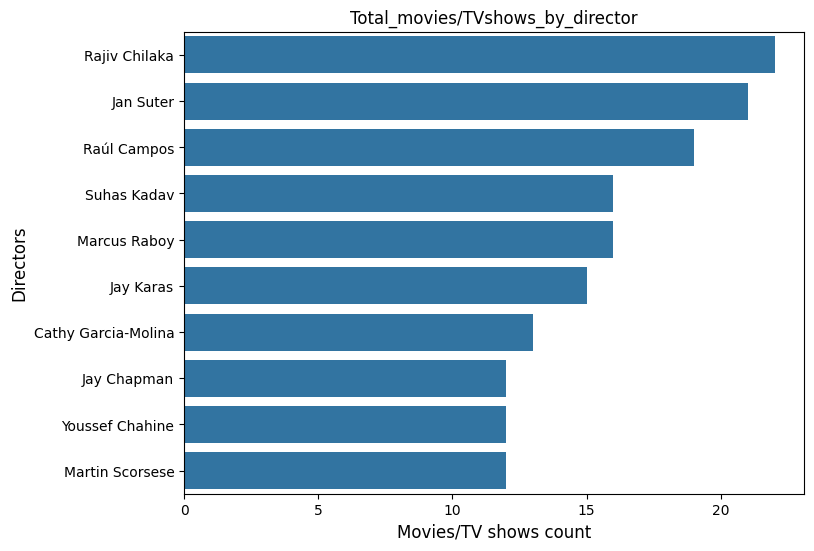

Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Scott McAboy       1
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Mozez Singh        1
Name: director, Length: 4993, dtype: int64

In [ ]:
plt.figure(figsize= (8 , 6))
sns.countplot(data = df_new , y = 'director' , order = top_10_dir , orient = 'v')
plt.xlabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('Movies/TV shows count')
plt.ylabel('Directors' , fontsize = 12)
plt.title('Total_movies/TVshows_by_director')
plt.show()
x = dir_tb.director.value_counts()
x

In [ ]:
# Lets check for top 10 countries
top_10_country = country_tb.country.value_counts().head(10).index
df_new = country_tb.loc[country_tb['country'].isin(top_10_country)]

In [ ]:
x = df_new.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'country' , columns = 'type' ,
        values = 'show_id').sort_values('Movie',
                                        ascending = False)

type,Movie,TV Show
country,,
United States,2750,932
India,962,84
United Kingdom,531,271
Canada,319,126
France,301,90
Germany,182,44
Spain,171,61
Japan,119,198
Mexico,111,58


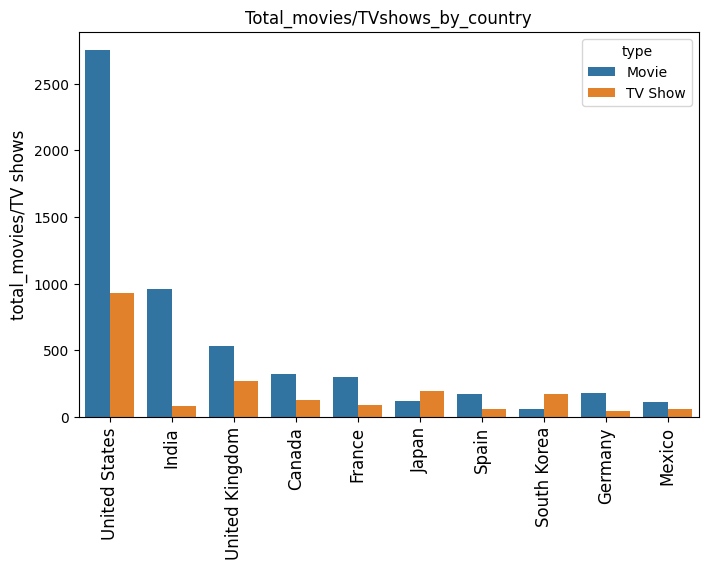

In [ ]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_new , x = 'country' , order = top_10_country , hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total_movies/TVshows_by_country')
plt.show()

In [ ]:
top_10_country = country_tb.country.value_counts().head(10).index
country_tb['cat'] = country_tb['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )

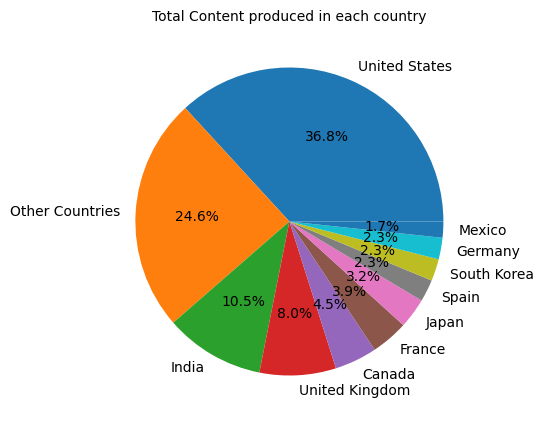

In [ ]:
x = country_tb.cat.value_counts()

plt.figure(figsize = (5,5))
plt.pie(x , labels = x.index, autopct='%1.1f%%')
plt.title('Total Content produced in each country' , fontsize = 10)
plt.show()

Observation:
1. United States is the HIGHEST contributor country on Netflix, followed by India and United Kingdom.
2. Maximum content of Netflix which is around 75% , is coming from these top 10 countries.
3. Rest of the world only contributes 25% of the content.

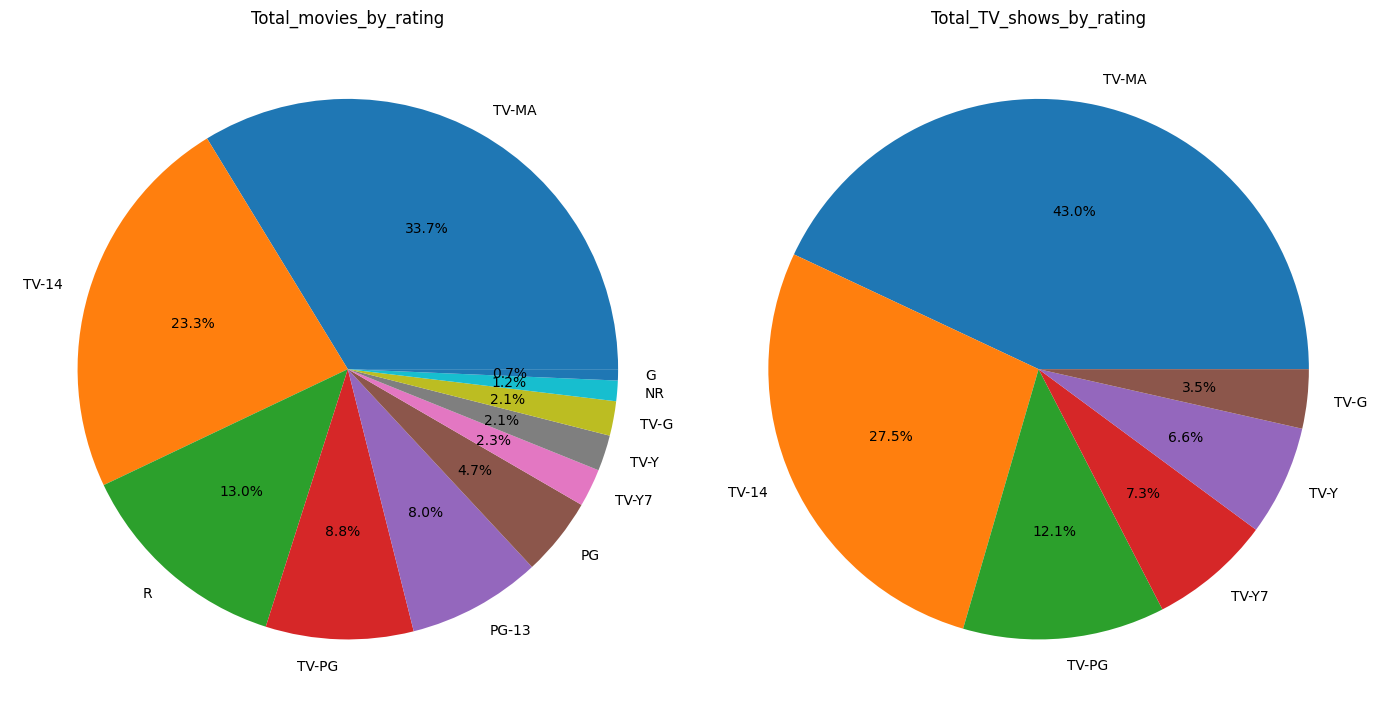

In [ ]:
#Total movies/TV shows distribution by rating of the content
m = movies.loc[~movies.rating.isin(['Not Available' , 'NC-17' , 'TV-Y7-FV'])]
m = m.rating.value_counts()
t = tv_shows.loc[~tv_shows.rating.isin(['Not Available' , 'R' , 'NR', 'TV-Y7-FV'])]
t = t.rating.value_counts()


fig, ax = plt.subplots(1,2, figsize=(14,8))
ax[0].pie(m , labels = m.index, autopct='%1.1f%%')
ax[0].set_title('Total_movies_by_rating')

ax[1].pie(t , labels = t.index, autopct='%1.1f%%')
ax[1].set_title('Total_TV_shows_by_rating')

plt.tight_layout()
plt.show()

In [ ]:
#top 10 gener in movies
top_10_movie_genres = genre_tb[genre_tb['type'] == 'Movie'].listed_in.value_counts().head(10).index
df_movie = genre_tb.loc[genre_tb['listed_in'].isin(top_10_movie_genres)]


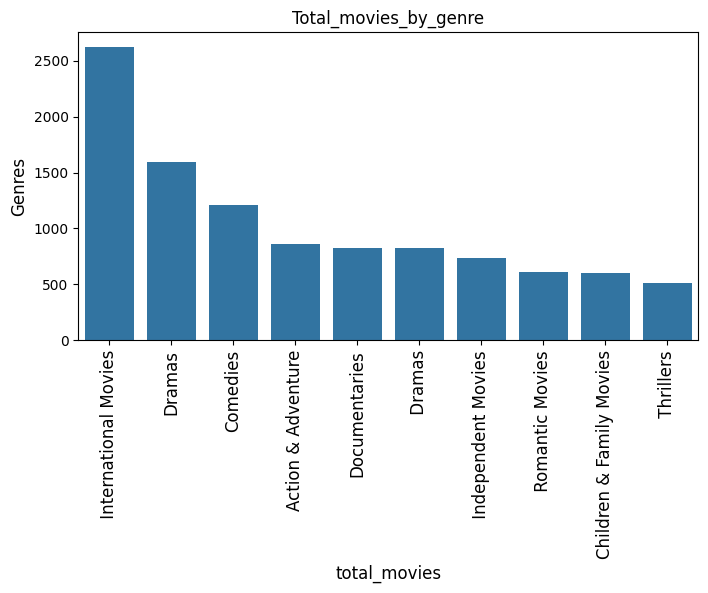

In [ ]:
plt.figure(figsize= (8,4))
sns.countplot(data = df_movie , x = 'listed_in' , order = top_10_movie_genres)
plt.xticks(rotation = 90 , fontsize = 12)
plt.xlabel('total_movies' , fontsize = 12)
plt.ylabel('Genres' , fontsize = 12)
plt.title('Total_movies_by_genre')
plt.show()

In [ ]:
top_10_TV_genres = genre_tb[genre_tb['type'] == 'TV Show'].listed_in.value_counts().head(10).index
df_tv = genre_tb.loc[genre_tb['listed_in'].isin(top_10_TV_genres)]

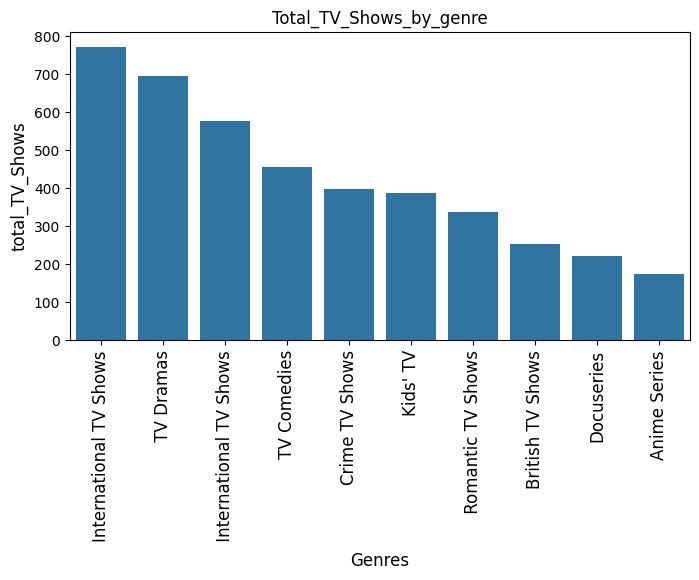

In [ ]:
plt.figure(figsize= (8,4))
sns.countplot(data = df_tv , x = 'listed_in' , order = top_10_TV_genres)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_TV_Shows' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_TV_Shows_by_genre')
plt.show()

In [ ]:
x = cast_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'cast'])['show_id'].count().reset_index()

In [ ]:
country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_actors = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)
for i in country_list:
    new = x.loc[x['country'].isin([i])].sort_values('show_id' , ascending = False).head(5)
    top_5_actors = pd.concat( [top_5_actors , new] , ignore_index = True)

In [ ]:
# top 5 actors in top countries and their movies/tv shows count
top_5_actors

,country,cast,show_id
0,United States,Tara Strong,22
1,United States,Samuel L. Jackson,22
2,United States,Fred Tatasciore,21
3,United States,Adam Sandler,19
4,United States,James Franco,19
5,India,Anupam Kher,40
6,India,Shah Rukh Khan,34
7,India,Naseeruddin Shah,31
8,India,Om Puri,29
9,India,Akshay Kumar,29


In [ ]:
#top gener in each country
x = genre_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'listed_in'])['show_id'].count().reset_index()
x.loc[x['country'] == 'United States'].sort_values('show_id' , ascending = False).head(5)

country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_genre = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

for i in country_list:
    new = x.loc[x['country'] == i].sort_values('show_id' , ascending = False).head(5)
    top_5_genre = pd.concat( [top_5_genre , new] , ignore_index = True)
top_5_genre

,country,listed_in,show_id
0,United States,Dramas,547
1,United States,Documentaries,487
2,United States,Comedies,406
3,United States,Action & Adventure,403
4,United States,Independent Movies,375
5,India,International Movies,826
6,India,Dramas,415
7,India,Comedies,271
8,India,Dramas,247
9,India,Independent Movies,166


Text(0.5, 1.0, 'Rating')

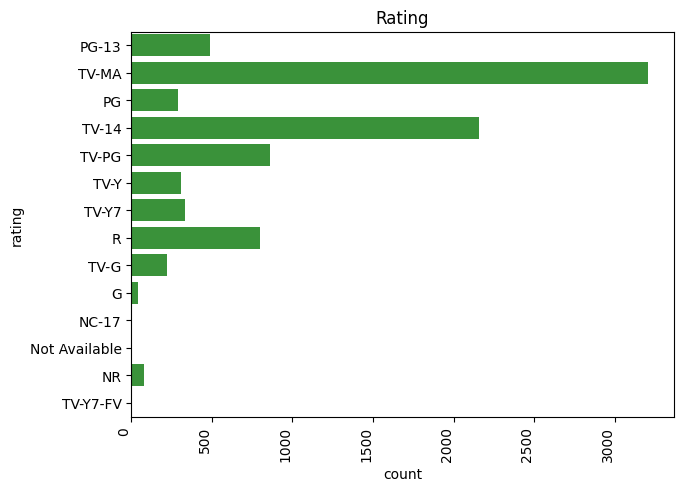

In [ ]:
#rating of shows and movies
x = df["rating"]
sns.countplot(x)
sns.countplot(x).set_xticklabels(sns.countplot(x).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(7,5)
plt.title('Rating')

In [ ]:
#  popular genres in top 10 countries
top_10_country = country_tb.country.value_counts().head(10).index
top_10_country = country_tb.loc[country_tb['country'].isin(top_10_country)]


In [ ]:
x = top_10_country.merge(genre_tb , on = 'show_id').drop_duplicates()
country_genre = x.groupby([ 'country' , 'listed_in'])['show_id'].count().sort_values(ascending = False).reset_index()
country_genre = country_genre.pivot(index = 'listed_in' , columns = 'country' , values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Genres')

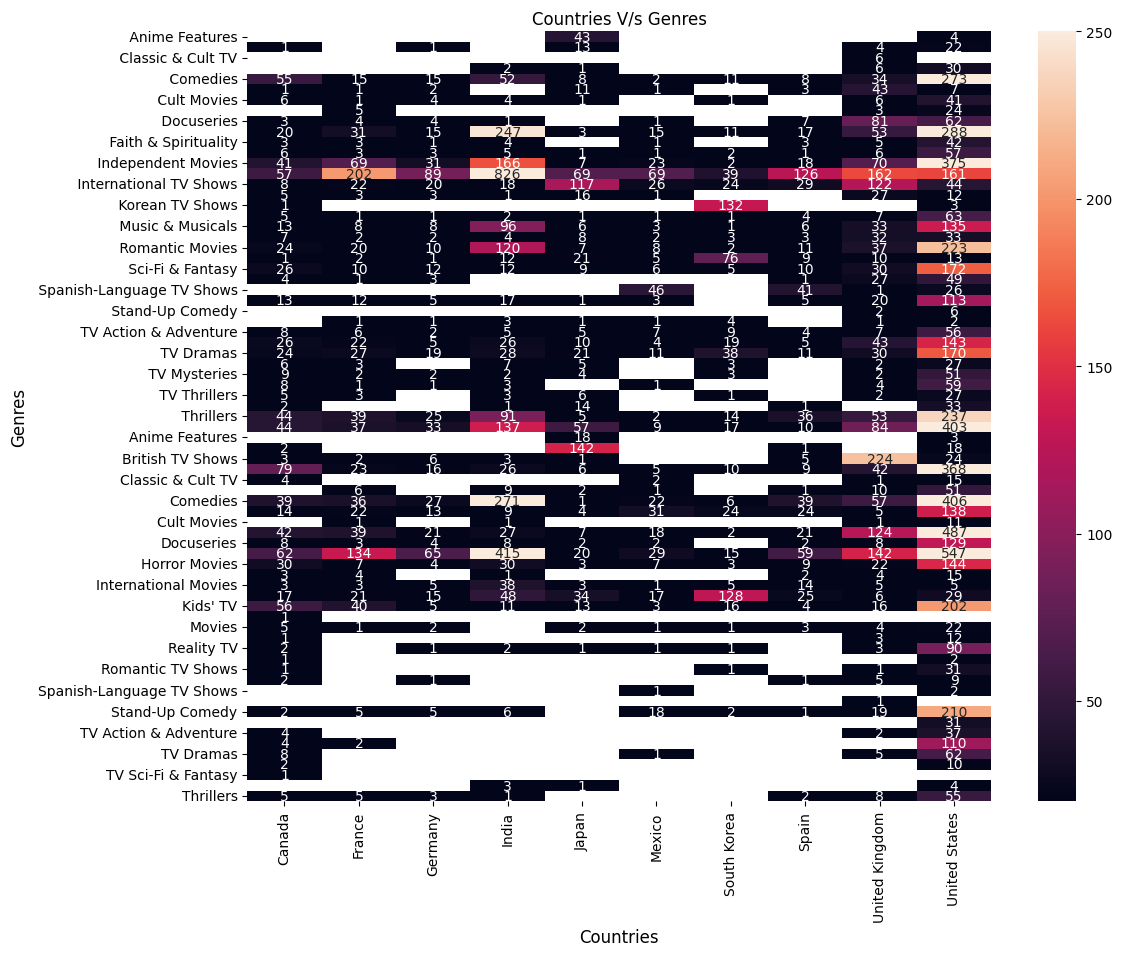

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(data = country_genre , annot = True , fmt=".0f" , vmin = 20 , vmax = 250 )
plt.xlabel('Countries' , fontsize = 12)
plt.ylabel('Genres' , fontsize = 12)
plt.title('Countries V/s Genres' , fontsize = 12)

#Observations

* Approximately 70% of the content on Netflix consists
of movies, while around 30% is TV shows.
* The uploading of movies and TV shows on Netflix began in 2008, with relatively fewer additions until 2014.
* A significant increase in content uploads is observed from 2015 onwards, with 2019 having the highest number of additions.
* There's a noticeable drop in content added in 2020 and 2021, possibly due to the pandemic, particularly affecting movies.
* Since 2018, there's been a decline in movies but a clear rise in TV shows, with TV shows surpassing movies in mid-2020, indicating the increasing popularity of TV shows.
* Netflix has movies from total 127 countries, United States being the highset contributor with almost 37% of all the content.
* Mostly country specific popular genres are observed in each country. Only United States have a good mix of almost all genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan) and so on.

#Recommendations
* Very limited genres are focussed in most of the countries except US.
* It seems the current available genres suits best for US and few countries but maximum countries need some more genres which are highly popular in the region.
* E.G. Indian Mythological content is highly popular. We can create such more country specific genres and It might also be liked acorss the world just like Japanese Anime.
* Netflix business is mostly centered towards movies.it should increase number of Tv,shows as it gauges more attention.
